# Aerofit Case Study

**About Aerofit**: Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.

## Business Problem
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.

## Dataset
Dataset that We will be using is [here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadm1639992749)

The company collected the data on individuals who purchased a treadmill from the AeroFit
stores during the prior three months. The dataset has the following features:

Product Purchased: KP281, KP481, or KP781

Age: In years

Gender: Male/Female

Education: In years

MaritalStatus: Single or partnered

Usage: The average number of times the customer plans to use the treadmill each week.

Income: Annual income (in $)

Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent

Miles: The average number of miles the customer expects to walk/run each week

## Product Portfolio
Product Portfolio:
- The KP281 is an entry-level treadmill that sells for $1,500.
  
- The KP481 is for mid-level runners that sell for $1,750.
  
- The KP781 treadmill is having advanced features that sell for $2,500.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-03-20 19:07:31--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.249.226.180, 13.249.226.102, 13.249.226.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.249.226.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.1’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 19:07:31 (144 MB/s) - ‘aerofit_treadmill.csv?1639992749.1’ saved [7279/7279]



In [3]:
data = pd.read_csv('aerofit_treadmill.csv?1639992749')

## Going Through the Data

In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.shape

(180, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There is No null value in the data set

In [8]:
data.sort_values(by="Income", ascending=True)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
2,KP281,19,Female,14,Partnered,4,3,30699,66
1,KP281,19,Male,15,Single,2,3,31836,75
80,KP481,19,Male,14,Single,3,3,31836,64
3,KP281,19,Male,12,Single,3,3,32973,85
...,...,...,...,...,...,...,...,...,...
171,KP781,33,Female,18,Partnered,4,5,95866,200
169,KP781,30,Male,18,Partnered,5,5,99601,150
168,KP781,30,Male,18,Partnered,5,4,103336,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [9]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Observations:
- The average income of customers is $53,719.
- The average distance a user walks on a treadmill is 103 Miles.
- More than 50% of people have a fitness score of 3.
- Average usage of a treadmill by a user is 3.3 times a week.

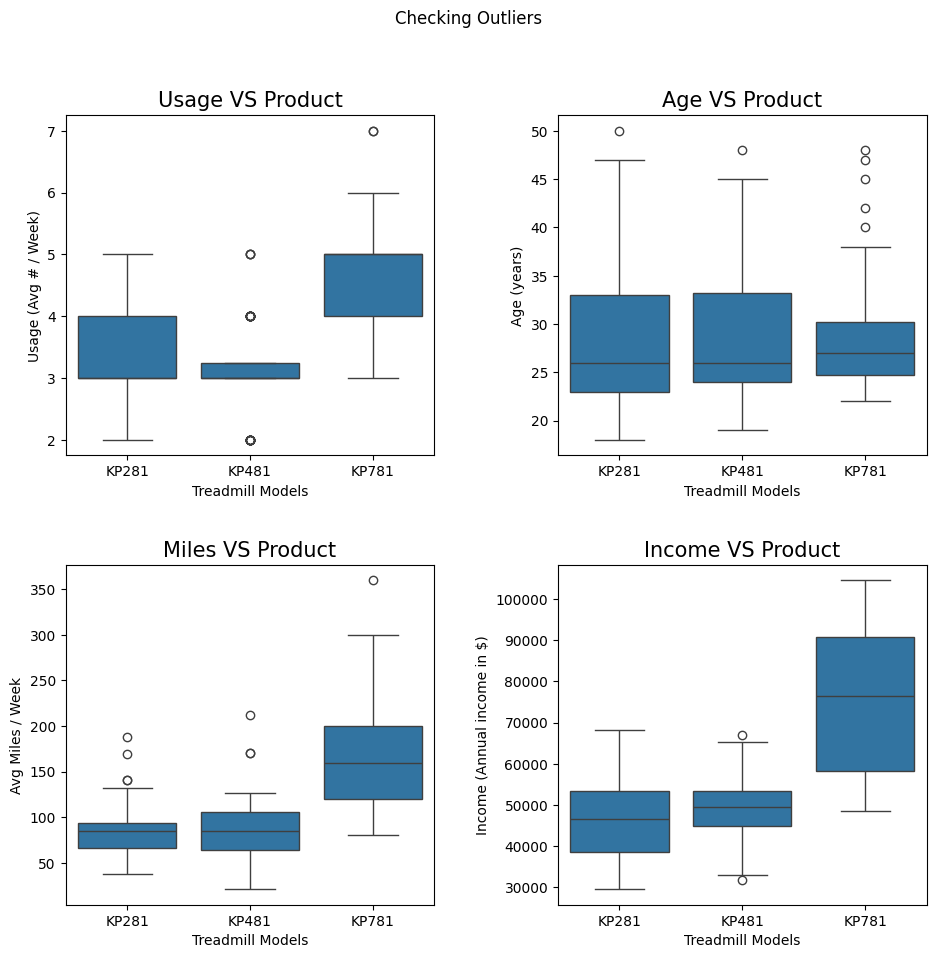

In [10]:
plt.figure(figsize=(10,10))
plt.suptitle("Checking Outliers")

plt.subplot(2,2,1)
sns.boxplot(data, x="Product", y="Usage")
plt.xlabel('Treadmill Models')
plt.ylabel('Usage (Avg # / Week)')
plt.title('Usage VS Product', fontsize = 15)

plt.subplot(2,2,2)
sns.boxplot(data, x="Product", y="Age")
plt.xlabel('Treadmill Models')
plt.ylabel('Age (years)')
plt.title('Age VS Product', fontsize = 15)

plt.subplot(2,2,3)
sns.boxplot(data, x="Product", y="Miles")
plt.xlabel('Treadmill Models')
plt.ylabel('Avg Miles / Week')
plt.title('Miles VS Product', fontsize = 15)

plt.subplot(2,2,4)
sns.boxplot(data, x="Product", y="Income")
plt.xlabel('Treadmill Models')
plt.ylabel('Income (Annual income in $)')
plt.title('Income VS Product', fontsize = 15)



plt.tight_layout(pad=3.0)
plt.show()

## Observations:
- Usage per Week:
    - KP781 has the highest median usage per week among the three models.
    - All models have outliers, indicating varying usage patterns among users.
- Age of Users:
    - The median age of users is similar across all three models.
    - The range of ages differs slightly, with KP281 having the widest spread.
- Miles Run:
    - KP781 shows a higher median for miles run compared to the other models.
    - Outliers suggest some users run significantly more miles on this model.
- Income of Users:
    - Users of KP781 have a noticeably higher median income compared to those using KP281 and KX481.
    - Income distribution varies among the models.

# Non-Graphical Analysis

In [11]:
p_count=data['Product'].value_counts()
p_count

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5f718db390>,
 [Text(1.1029846853969052, 0.1944859475126421, 'KP281'),
  Text(-0.7199221674761052, -0.8579697388466023, 'KP481'),
  Text(-0.7199220469827118, 0.8579698399525605, 'KP781')],
 [Text(0.6105808079875725, 0.10766186380164114, '44%'),
  Text(-0.3985283427099867, -0.47494753400436907, '33%'),
  Text(-0.3985282760082869, 0.4749475899737388, '22%')])

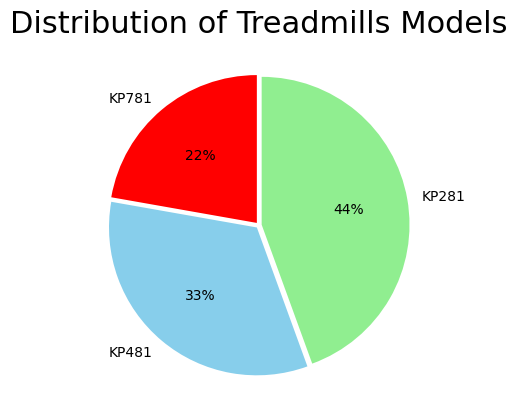

In [12]:
vals = data['Product'].value_counts()
labels = vals.index
plt.title('Distribution of Treadmills Models', fontsize = 22)
plt.pie(vals, labels=labels, explode = [0.02,0.02,0.02], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['lightgreen', 'skyblue', 'red'])

### Observations:
- KP281 which is a entry level treadmill is purchesed the most.
- After KP481 which is mid range treadmill is purchesd most.
- KP781 which is advanced treadmill is purchased least by the custom

In [13]:
data['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5f9c998bd0>,
 [Text(1.0770282349354128, -0.268533389268279, 'Male'),
  Text(-1.0770282097934978, 0.2685334901069388, 'Female')],
 [Text(0.5918803813609025, -0.14757240311139658, '58%'),
  Text(-0.5918803675441744, 0.1475724585272366, '42%')])

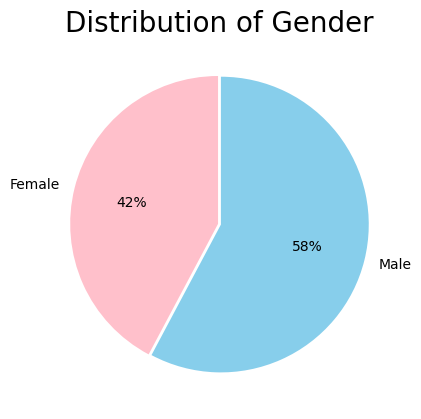

In [14]:

data_p = data['Gender'].value_counts()
labels = data_p.index
plt.title('Distribution of Gender', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.01,0.01], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['skyblue', 'pink'])

### Observations:
- 58% of the customers are male
- 42% of the customers are female

In [15]:
data['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5f9c803050>,
 [Text(1.0614982696658786, -0.3245326231619039, 'Partnered'),
  Text(-1.0614982696658786, 0.32453262316190373, 'Single')],
 [Text(0.5833458959425096, -0.178346756872758, '59%'),
  Text(-0.5833458959425096, 0.1783467568727579, '41%')])

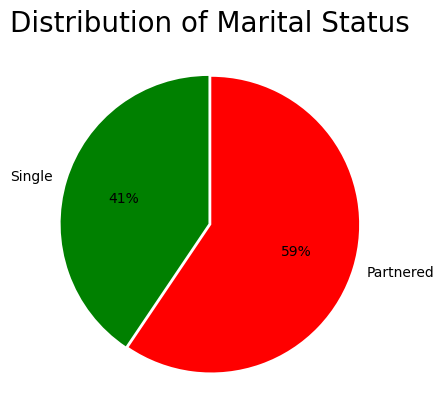

In [16]:
data_p = data['MaritalStatus'].value_counts()
labels = data_p.index
plt.title('Distribution of Marital Status', fontsize = 20)
plt.pie(data_p, labels=labels, explode = [0.01,0.01], autopct='%1.0f%%',
        startangle=90, counterclock=False, colors=['red', 'green'])

### Observations:
- 58% of the customers are married
- 41% of the customers are single

# Graphical Analysis

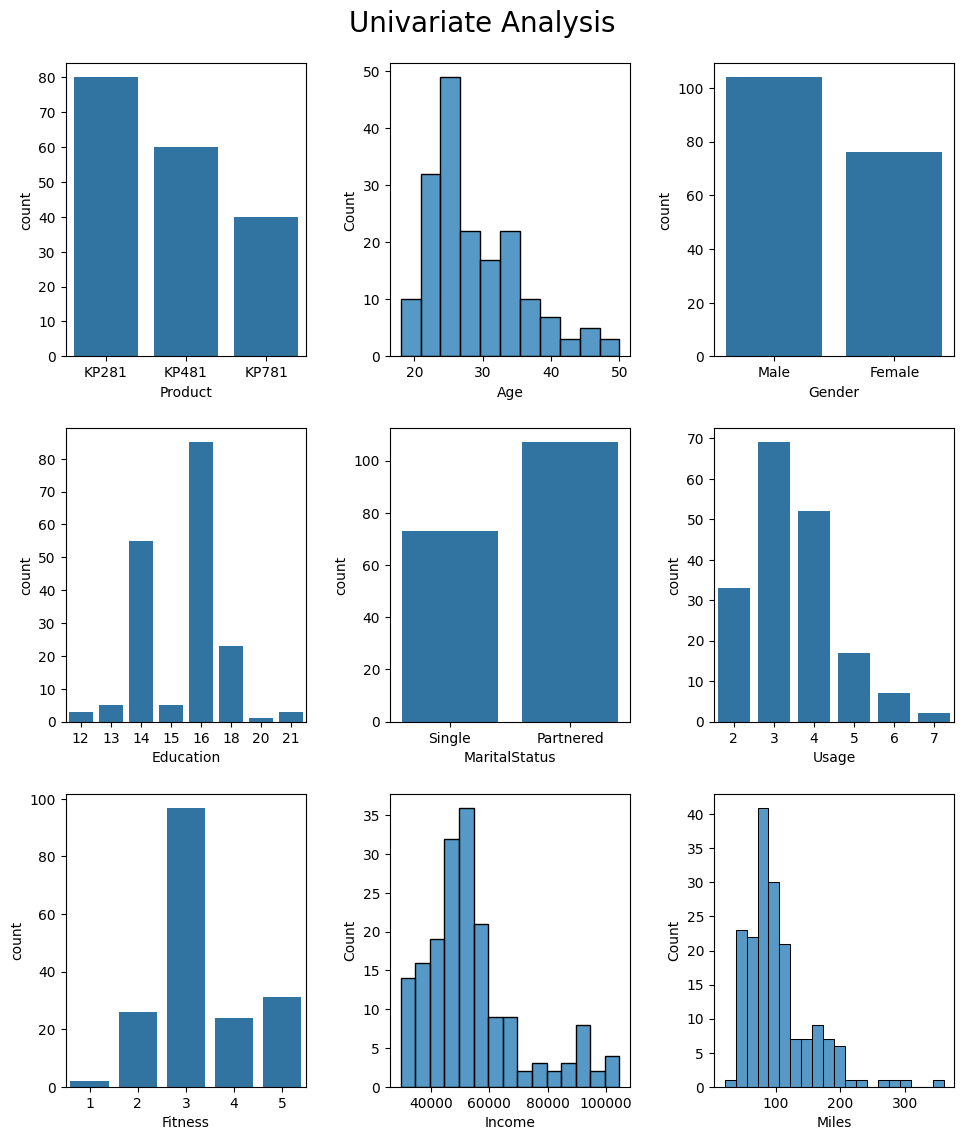

In [17]:
plt.figure(figsize=(10,15))
plt.suptitle('Univariate Analysis', fontsize=20)

# Treadmill Model Counts
plt.subplot(4,3,1)
sns.countplot(data, x= 'Product')

# Age Count
plt.subplot(4,3,2)
sns.histplot(data, x= 'Age')

# Gender Count
plt.subplot(4,3,3)
sns.countplot(data, x= 'Gender')

# Education Count
plt.subplot(4,3,4)
sns.countplot(data, x= 'Education')

# Marital Status Count
plt.subplot(4,3,5)
sns.countplot(data, x= 'MaritalStatus')

# Usage Count
plt.subplot(4,3,6)
sns.countplot(data, x= 'Usage')

# Fitness Count
plt.subplot(4,3,7)
sns.countplot(data, x= 'Fitness')

# Income Count
plt.subplot(4,3,8)
sns.histplot(data, x= 'Income')

# Miles Count
plt.subplot(4,3,9)
sns.histplot(data, x= 'Miles')


plt.tight_layout(pad=2.0)

### Observations:
- Maximum Number of customers are in Age group of 20 to 30 Years.
- The Company has more number of Male customers than Female customers.
- Maximum Customers have 14-16 Years of Education.
- Maximum Number of customers Lies between 60k Income Group

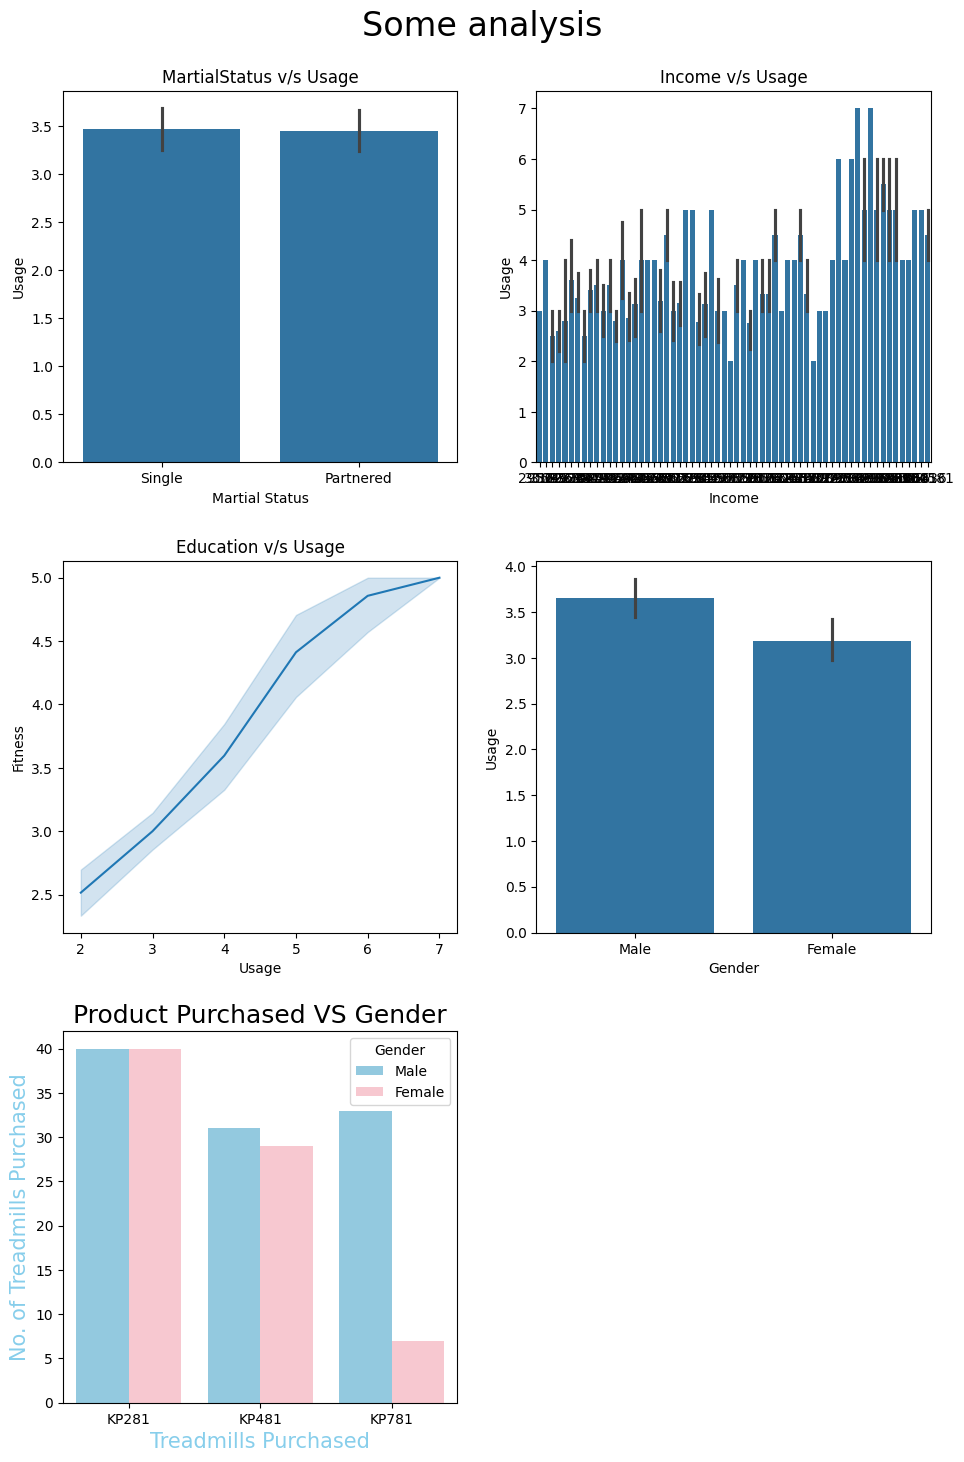

In [18]:
plt.figure(figsize=(10,15))
plt.suptitle('Some analysis', fontsize = 24)

plt.subplot(3,2,1)
sns.barplot(data, x='MaritalStatus', y='Usage')
plt.xlabel('Martial Status')
plt.ylabel('Usage')
plt.title('MartialStatus v/s Usage')

plt.subplot(3,2,2)
sns.barplot(data, x='Income', y='Usage')
plt.xlabel('Income')
plt.ylabel('Usage')
plt.title('Income v/s Usage')

plt.subplot(3,2,3)
sns.lineplot(data, x='Usage', y='Fitness')
plt.xlabel('Usage')
plt.ylabel('Fitness')
plt.title('Education v/s Usage')

plt.subplot(3, 2, 4)
sns.barplot(data, x='Gender', y='Usage')
plt.xlabel('Gender')
plt.ylabel('Usage')

custom_palette = ['skyblue', 'pink']

plt.subplot(3, 2, 5)
sns.countplot(data, x='Product', hue='Gender', palette=custom_palette)
plt.title('Product Purchased VS Gender', fontsize= 18, color= 'black')
plt.ylabel('No. of Treadmills Purchased', fontsize= 15, color= 'skyblue')
plt.xlabel('Treadmills Purchased', fontsize= 15, color= 'skyblue')


plt.tight_layout(pad=2.0)
plt.show()

### Observations:
- We observe an almost linear relation between education and usage.
- There is almost no relation between martial status and usage

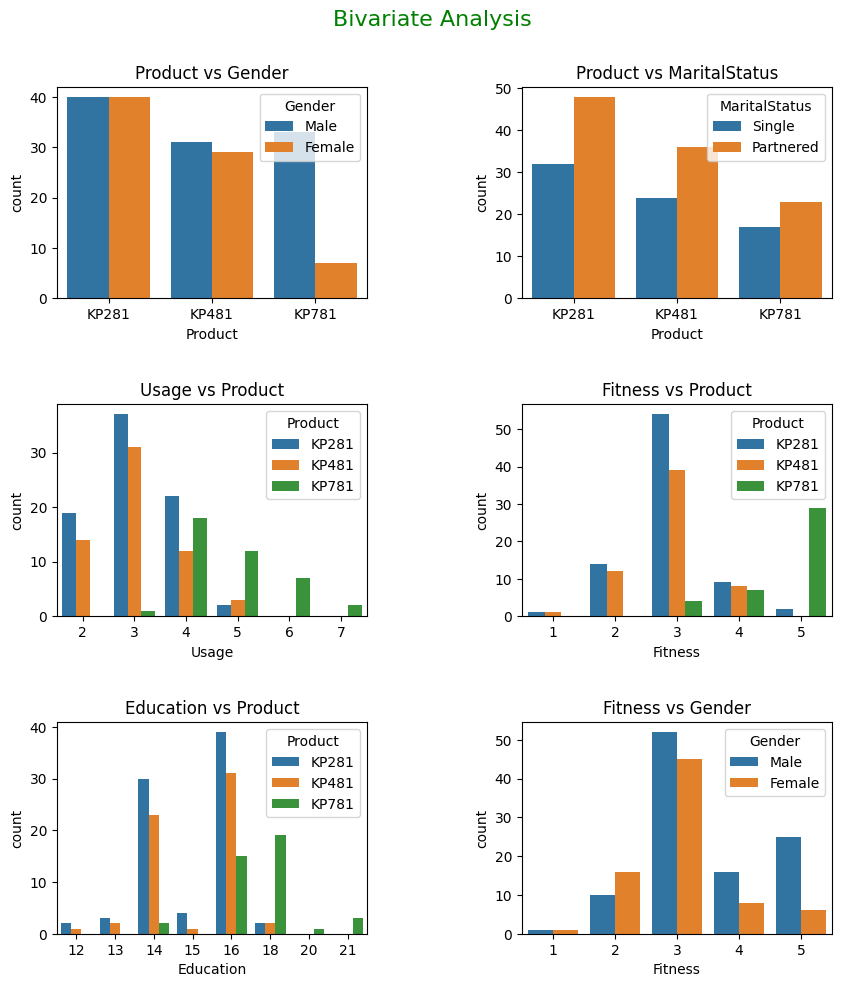

In [19]:
fig,ax=plt.subplots(3,2,figsize=(10,11))
fig.subplots_adjust(wspace=.5,hspace=.5)
fig.suptitle('Bivariate Analysis',y=.95,fontsize=16,color='green')

sns.countplot(data,x='Product',hue='Gender',ax=ax[0,0])
sns.countplot(data,x='Product',hue='MaritalStatus',ax=ax[0,1])
sns.countplot(data,x='Usage',hue='Product',ax=ax[1,0])
sns.countplot(data,x='Fitness',hue='Product',ax=ax[1,1])
sns.countplot(data,x='Education',hue='Product',ax=ax[2,0])
sns.countplot(data,x='Fitness',hue='Gender',ax=ax[2,1])


ax[0,0].set_title('Product vs Gender')
ax[0,1].set_title('Product vs MaritalStatus')
ax[1,0].set_title('Usage vs Product')
ax[1,1].set_title('Fitness vs Product')
ax[2,0].set_title('Education vs Product')
ax[2,1].set_title('Fitness vs Gender')

plt.show()

### Observation:
- Customer with 16 years of education prefer to buy KP281
- Customer whose usage is more than 3 days a week prefer machine KP781
- Customer with more than 16 years of education prefer to use KP781

# Probability

In [20]:
p_count=data['Product'].value_counts(normalize=True)
p_count

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

- Probability that people will buy KP281 is 44%
- Probability that people will buy KP481 is 33%
- Probability that people will buy KP781 is 22%

In [21]:
filtered_data = data[['Product','Gender']]
pd.crosstab(filtered_data['Product'], filtered_data['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


- the P( Male buying KP781) = 31.7%
- the P( Male buying KP481) =  29.8%
- the P( Male buying KP281) = 38.4%

In [22]:
print("Probability (Product | Partnered)")
print(data[data["MaritalStatus"] == "Partnered"]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Single)")
data[data["MaritalStatus"] == "Single"]["Product"].value_counts(normalize=True)


Probability (Product | Partnered)
Product
KP281    0.448598
KP481    0.336449
KP781    0.214953
Name: proportion, dtype: float64

Probability (Product | Single)


Product
KP281    0.438356
KP481    0.328767
KP781    0.232877
Name: proportion, dtype: float64

**Observation**:
Single users have higher probability of buying KP781 than Partnered users Partnered users have higher probability of buying KP481.

In [23]:

print("Probability (MaritalStatus | KP281)")
print(data[data["Product"] == "KP281"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP481)")
print(data[data["Product"] == "KP481"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP781)")
print(data[data["Product"] == "KP781"]["MaritalStatus"].value_counts(normalize=True))

Probability (MaritalStatus | KP281)
MaritalStatus
Partnered    0.6
Single       0.4
Name: proportion, dtype: float64

Probability (MaritalStatus | KP481)
MaritalStatus
Partnered    0.6
Single       0.4
Name: proportion, dtype: float64

Probability (MaritalStatus | KP781)
MaritalStatus
Partnered    0.575
Single       0.425
Name: proportion, dtype: float64


In [24]:
print("\nProbability (Product | Single & Male)")
data[(data["MaritalStatus"] == "Single") & (data["Gender"]=="Male")]["Product"].value_counts(normalize=True)


Probability (Product | Single & Male)


Product
KP281    0.441860
KP781    0.325581
KP481    0.232558
Name: proportion, dtype: float64

In [25]:
print("\nProbability (Product | Partnered & Male)")
data[(data["MaritalStatus"] == "Partnered") & (data["Gender"]=="Male")]["Product"].value_counts(normalize=True)


Probability (Product | Partnered & Male)


Product
KP281    0.344262
KP481    0.344262
KP781    0.311475
Name: proportion, dtype: float64

In [26]:
print(" \nProbability (Product | Single & Female)")
data[(data["MaritalStatus"] == "Single") & (data["Gender"]=="Female")]["Product"].value_counts(normalize=True)

 
Probability (Product | Single & Female)


Product
KP481    0.466667
KP281    0.433333
KP781    0.100000
Name: proportion, dtype: float64

In [27]:
print("\nProbability (Product | Partnered & Female)")
data[(data["MaritalStatus"] == "Partnered") & (data["Gender"]=="Female")]["Product"].value_counts(normalize=True)


Probability (Product | Partnered & Female)


Product
KP281    0.586957
KP481    0.326087
KP781    0.086957
Name: proportion, dtype: float64

# Correlation among different factors

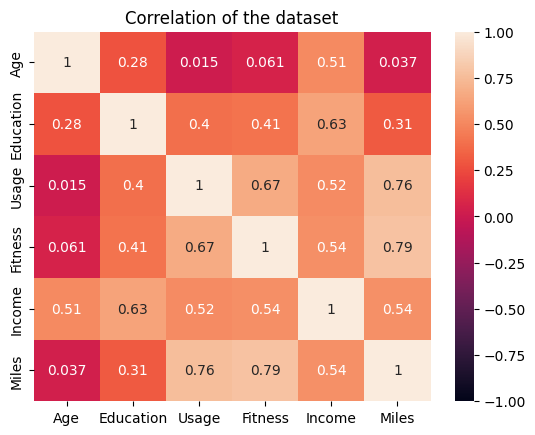

In [28]:
continuous_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
sns.heatmap(data=data[continuous_columns].corr(), annot=True, vmin=-1, vmax=1)
plt.title("Correlation of the dataset")
plt.show()

# Observations
- Best Selling Treadmill model is 'KP281' while the least sold Treadmill is 'KP781'
- There are more Male customers than Female customers.
- Maximum Number of customers are in Age group of 20 to 30 Years.
- Maximum Customers have 14-16 Years of Education.
- Maximum Number of customers Lies between 60k Income Group
- The company has more number of Married customers than Single Customers.
- Majority of theCustomers use the Treadmill for 3 days a week.
- Most of the customers gave them a self rated Fitness score of 3 while only some customers gave them 1.
- Maximum number of customers runs 94 miles per week on an average on Treadmills.

# Recomendations
- **KP281:**:
    - Both Male and Female customers are equally likely to buy the model.
    The company should target more customers with 3 days/week usage for 'KP281'.
    - The company should target more Partnered customers than Single customers for 'KP281'.
    The company should target more customers with 16 years of education for 'KP281'.
- **KP481:**
    - Male and Female customers are almost equally likely to buy 'KP481'. so, company should target both of them.
    - The company should target more customers with 14-16 years of education for 'KP481'
    - The company should target more Partnered customers than Single customers for 'KP481'.
    - Company should target more customers with 3 days/week usage for 'KP481'.
- **KP781:**
    - Male customers are more likely to buy this product.
    The company should target more customers with 18 years of education for 'KP781'.
    - Company should target more customers with Usage of 4 days/week for 'KP781'.
    - The company should target more Partnered customers than Single customers for 'KP781'.